https://github.com/GorkemKola/Bitcoin-Price-Prediction/blob/main/BitcoinPricePrediction/BitcoinPricePrediction.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error, r2_score
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
def metric(true, predict):
  #RMSE
  print("Root Mean Square Error (RMSE):", np.sqrt(mean_squared_error(true, predict)))
  #MAPE
  print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(true,predict)*100)
  # r2
  print("r2 score:", r2_score(true,predict))
  print()

def plot(true, predict, date):
    D = pd.DataFrame()
    D['Date'] = date
    D['Obs'] = true
    D['Sim'] = predict
    D = D.sort_values('Date').reset_index().drop(columns = 'index')

    fig = plt.figure(figsize = (20,10))
    plt.plot(D['Date'], D['Obs'].values, label = 'Actual', linewidth=3)
    plt.plot(D['Date'], D['Sim'], color = 'orange' , label = 'Prediction', linewidth=3)
    plt.legend(fontsize=25)
    plt.xticks(fontsize = 30)
    plt.yticks(fontsize =30)
    # plt.savefig('/content/drive/MyDrive/Tài liệu học tập/Machine learning/Project/Result/Manhattan/Manhattan_k_'+str(k)+'.png')
    plt.show()

# **1. Data Preprocessing**

In [3]:
url = 'https://raw.githubusercontent.com/lavibula/ML20222.PredictionBitcoin/main/data/data.csv'
df = pd.read_csv(url, sep = ',')

In [4]:
df

,Date,BTC_close,BTC_open,BTC_high,BTC_low,difficulty,addresses_active_count,sum_lock_weight,mean_lock_size_ytes,total_fees_usd,...,ETH,LTC,XRP,DOGE,COPPER,GOLD,SILVER,SPX,JP225,DJI
0,2023-06-22,29890.5,29992.8,30497.8,29590.4,52350439455487,1000988,547153915,1.650655e+06,1.292778e+06,...,1872.32,85.97,0.49401,0.065567,3.8900,1923.70,22.467,4381.89,33445.0,34210.0
1,2023-06-21,29996.9,28307.7,30769.5,28270.5,52350439455487,920555,483181576,1.611773e+06,1.347976e+06,...,1889.87,85.12,0.49995,0.065644,3.9135,1944.90,22.810,4365.69,33390.0,34235.0
2,2023-06-20,28307.7,26845.9,28393.0,26665.5,52350439455487,951926,543133484,1.677592e+06,1.052364e+06,...,1791.61,80.31,0.49270,0.063108,3.8835,1947.70,23.234,4388.71,33155.0,34356.0
3,2023-06-19,26845.9,26339.7,27029.7,26295.1,52350439455487,920552,567091224,1.758290e+06,8.514319e+05,...,1737.06,77.51,0.49341,0.062429,3.8643,1964.05,24.062,0.00,0.0,0.0
4,2023-06-18,26339.7,26515.0,26679.3,26290.6,52350439455487,883864,603064705,1.985675e+06,7.946708e+05,...,1720.98,77.20,0.48699,0.062107,3.8738,1969.45,24.198,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656,2016-03-14,414.3,412.4,416.1,411.2,158427203767,451902,437739524,7.199663e+05,1.689298e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
2657,2016-03-13,412.4,410.4,415.9,409.6,158427203767,421585,334817852,6.293569e+05,1.460678e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
2658,2016-03-12,410.4,419.1,420.7,407.0,158427203767,374730,331208848,5.750154e+05,1.398444e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
2659,2016-03-11,419.1,415.8,422.4,415.1,158427203767,434658,398582424,6.227850e+05,1.710193e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df = df.sort_values('Date').reset_index().drop(columns = 'index')

In [7]:
df.head()

,Date,BTC_close,BTC_open,BTC_high,BTC_low,difficulty,addresses_active_count,sum_lock_weight,mean_lock_size_ytes,total_fees_usd,...,ETH,LTC,XRP,DOGE,COPPER,GOLD,SILVER,SPX,JP225,DJI
0,2016-03-10,415.8,412.8,417.5,410.3,158427203767,445273,426654988,688153.206452,17312.723752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-03-11,419.1,415.8,422.4,415.1,158427203767,434658,398582424,622785.037500,17101.930760,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-03-12,410.4,419.1,420.7,407.0,158427203767,374730,331208848,575015.361111,13984.439830,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-03-13,412.4,410.4,415.9,409.6,158427203767,421585,334817852,629356.864662,14606.780891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-03-14,414.3,412.4,416.1,411.2,158427203767,451902,437739524,719966.322368,16892.976657,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### **1.1. Shifting**

In [8]:
df['BTC_close'] = df["BTC_close"][1:].reset_index(drop=True)
df = df.dropna()

In [9]:
df

,Date,BTC_close,BTC_open,BTC_high,BTC_low,difficulty,addresses_active_count,sum_lock_weight,mean_lock_size_ytes,total_fees_usd,...,ETH,LTC,XRP,DOGE,COPPER,GOLD,SILVER,SPX,JP225,DJI
0,2016-03-10,419.1,412.8,417.5,410.3,158427203767,445273,426654988,6.881532e+05,1.731272e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
1,2016-03-11,410.4,415.8,422.4,415.1,158427203767,434658,398582424,6.227850e+05,1.710193e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
2,2016-03-12,412.4,419.1,420.7,407.0,158427203767,374730,331208848,5.750154e+05,1.398444e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
3,2016-03-13,414.3,410.4,415.9,409.6,158427203767,421585,334817852,6.293569e+05,1.460678e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
4,2016-03-14,415.1,412.4,416.1,411.2,158427203767,451902,437739524,7.199663e+05,1.689298e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,2023-06-17,26339.7,26341.3,26767.3,26183.5,52350439455487,863600,559141195,1.724510e+06,1.041701e+06,...,1727.79,76.87,0.47940,0.062193,0.0000,0.00,0.000,0.00,0.0,0.0
2656,2023-06-18,26845.9,26515.0,26679.3,26290.6,52350439455487,883864,603064705,1.985675e+06,7.946708e+05,...,1720.98,77.20,0.48699,0.062107,3.8738,1969.45,24.198,0.00,0.0,0.0
2657,2023-06-19,28307.7,26339.7,27029.7,26295.1,52350439455487,920552,567091224,1.758290e+06,8.514319e+05,...,1737.06,77.51,0.49341,0.062429,3.8643,1964.05,24.062,0.00,0.0,0.0
2658,2023-06-20,29996.9,26845.9,28393.0,26665.5,52350439455487,951926,543133484,1.677592e+06,1.052364e+06,...,1791.61,80.31,0.49270,0.063108,3.8835,1947.70,23.234,4388.71,33155.0,34356.0


### **1.2. Feature Selection**


from Random Forest model, we have 3 important features:
'BTC_high', 'BTC_low', 'BTC_open'

In [10]:
top = ['BTC_high', 'BTC_low', 'BTC_open']
columns = df.columns
drop_columns = []
for column in columns:
  if column not in top:
    drop_columns.append(column)
df3 = df.drop(columns = drop_columns)

In [11]:
df3['BTC_close'] = df['BTC_close']
df3['Date'] = df['Date']

In [12]:
df = df3.copy()

### **1.3. Normalization**

- a process that important in KNN - an algorithm that prediction based on calculating distance between data points.
- normalization: change all units and magnitudes to only one range to avoid bias to any features.
- In my programming, I choose MinMaxScaling method to normalize the data.

- formulas of Min Max Scaling: x_normalized = (x - min(x)) / (max(x) - min(x)
> scale data to a fixed range, between 0 and 1

In [13]:
scaler = MinMaxScaler()
df1 = df.drop("Date", axis = 1, inplace = False).drop("BTC_close", axis = 1, inplace = False)
X = df1.copy()
scaled = scaler.fit_transform(X)
display(scaled)

array([[6.85334585e-05, 1.02070426e-04, 1.24369055e-04],
       [1.13229192e-04, 1.73519724e-04, 1.97170452e-04],
       [1.62394499e-04, 1.48731192e-04, 7.43180936e-05],
       ...,
       [3.86342474e-01, 3.88147582e-01, 3.92718040e-01],
       [3.93884134e-01, 4.08026527e-01, 3.98335881e-01],
       [4.15662875e-01, 4.42679436e-01, 4.22678849e-01]])

### **1.4. Split data**

In [14]:
# 70/15/15
Y = pd.DataFrame()
Y = df['BTC_close']
X_train, X_test, Y_train, Y_test = train_test_split(scaled, Y, test_size=0.15, random_state=0,shuffle=False)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=15/85, random_state=0, shuffle=False)
train_date, test_date = train_test_split(df['Date'], test_size=0.15, random_state=0,shuffle=False)
train_date, valid_date = train_test_split(train_date, test_size=15/85, random_state=0,shuffle=False)
Y_valid = np.array(Y_valid)
X_valid = np.array(X_valid)
Y_test = np.array(Y_test)
X_test = np.array(X_test)

In [15]:
print("x_train:",X_train.shape), print("y_train: ",Y_train.shape)
print("x_valid: ",X_valid.shape), print("y_valid: ",Y_valid.shape)
print("x_test: ",X_test.shape), print("y_test: ",Y_test.shape)

x_train: (1862, 3)
y_train:  (1862,)
x_valid:  (399, 3)
y_valid:  (399,)
x_test:  (399, 3)
y_test:  (399,)


(None, None)

# **2. Default**

In [16]:
neighbors = KNN()
neighbors.fit(X_train, Y_train)

KNeighborsRegressor()

##### **2.1. Train set**

Metric:
Root Mean Square Error (RMSE): 601.3230080028521
Mean Absolute Percentage Error (MAPE): 2.7337617487028227
r2 score: 0.9968705296820718

Visualization:


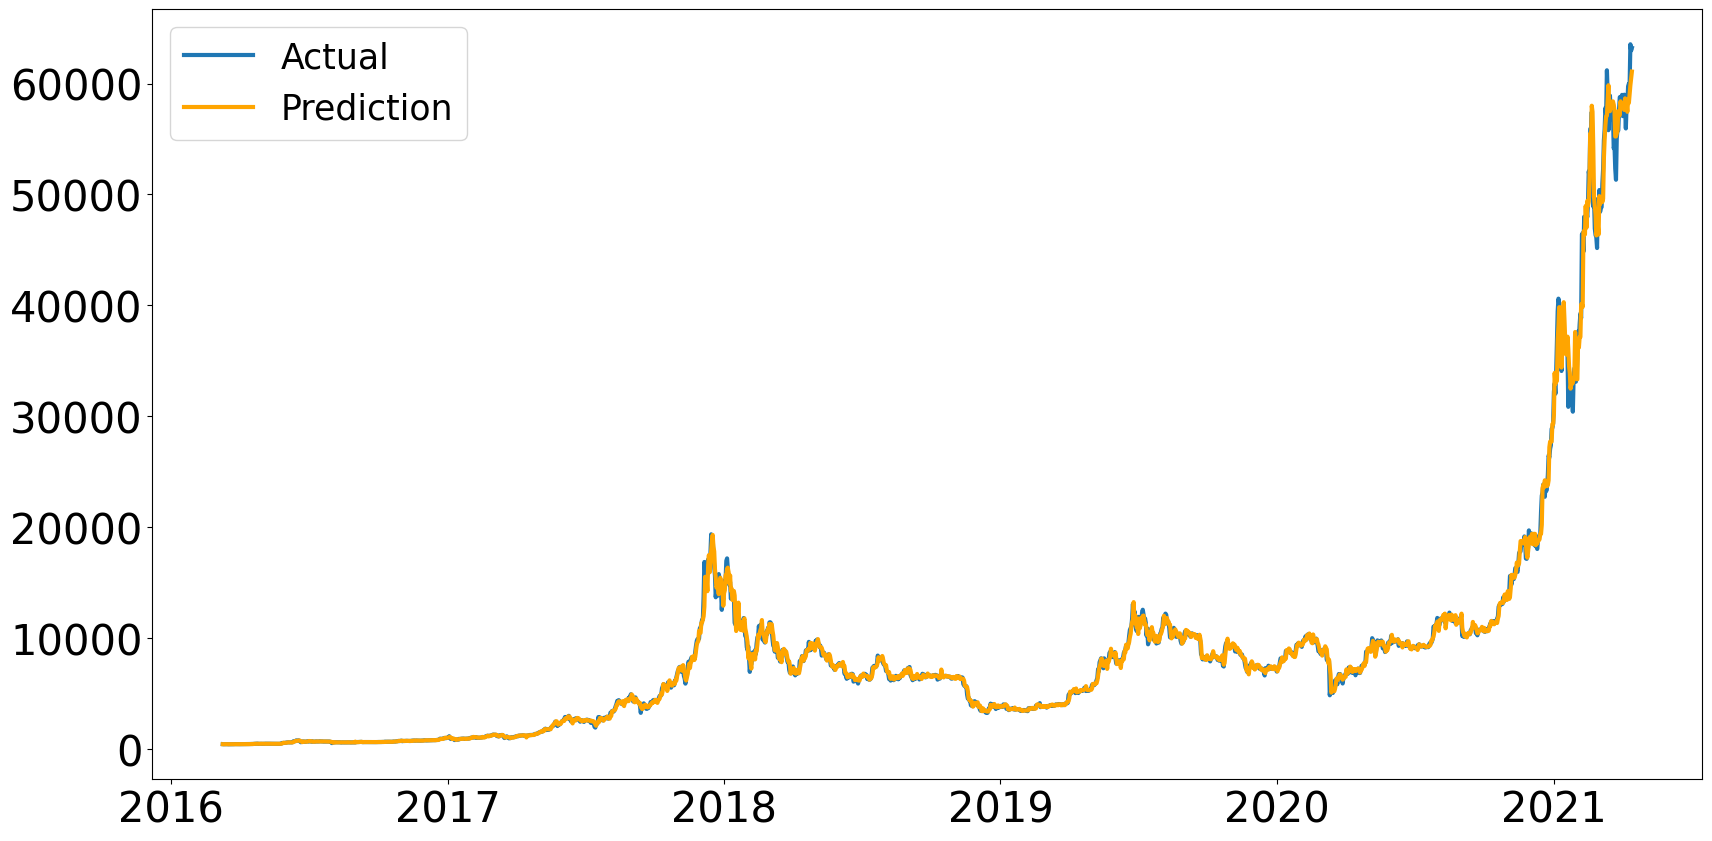

In [17]:
true_train = Y_train.copy()
prediction_train = neighbors.predict(X_train)

print('Metric:')
metric(true_train, prediction_train)
print('Visualization:')
plot(true_train, prediction_train, train_date)

##### **2.2. Valid set**

Metric:
Root Mean Square Error (RMSE): 2460.156635958292
Mean Absolute Percentage Error (MAPE): 4.3073432135625085
r2 score: 0.9228642452568868

Visualization:


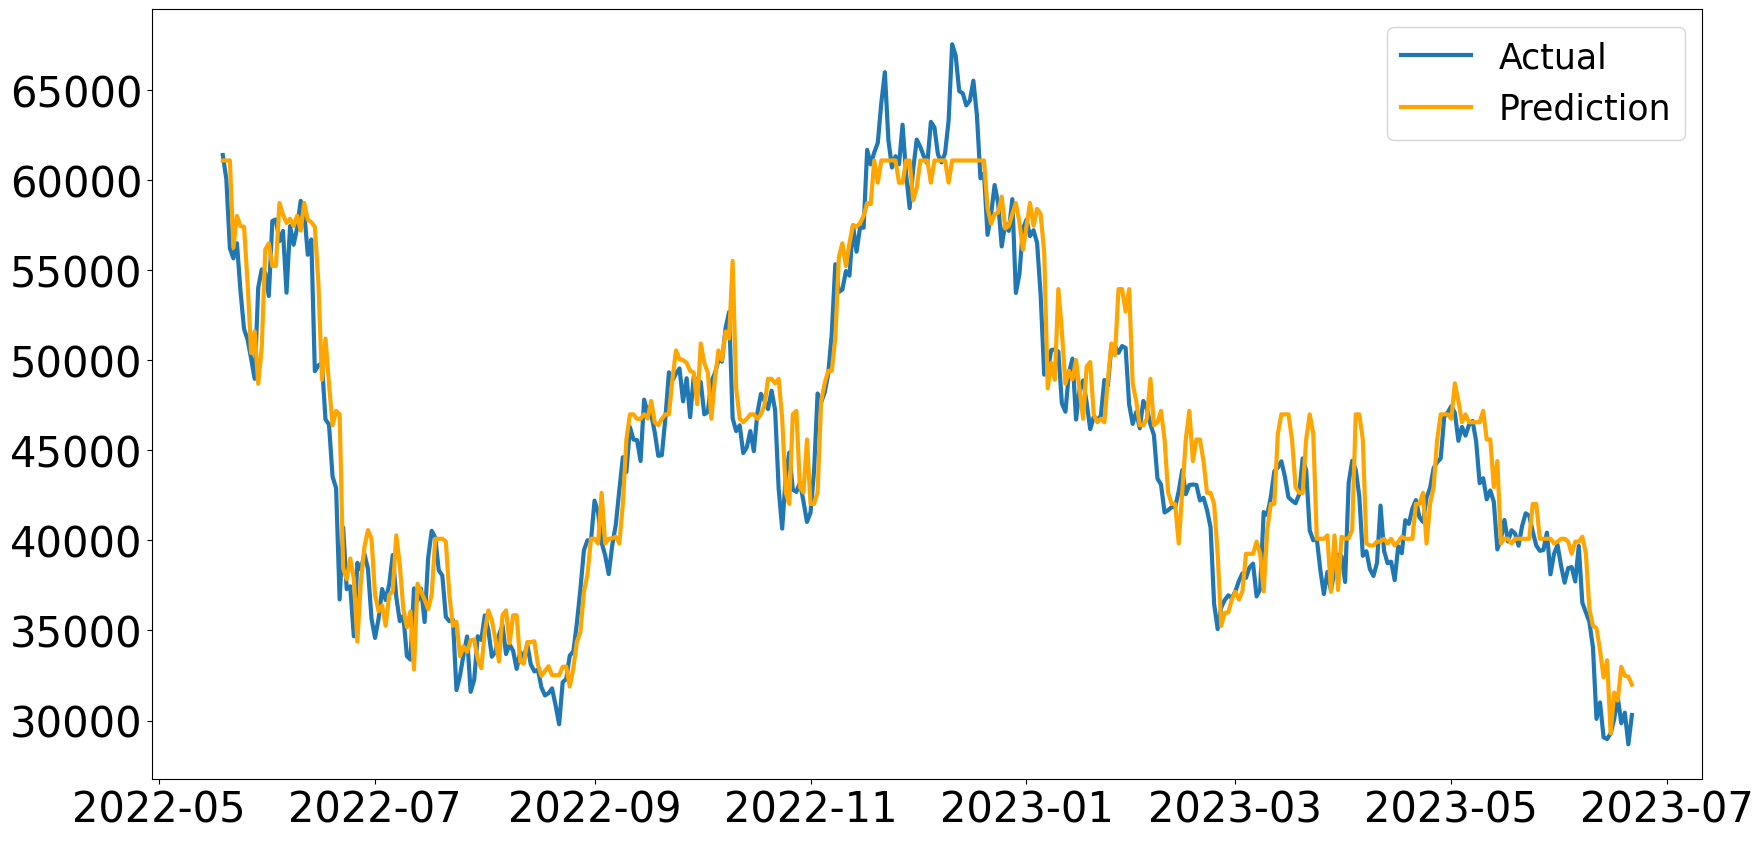

In [18]:
true_test = Y_valid.copy()
prediction_test = neighbors.predict(X_valid)

print('Metric:')
metric(true_test, prediction_test)
print('Visualization:')
plot(true_test, prediction_test, test_date)

# **3. Hyperparameters tuning**

2 hyperparameters of KNN:
- n_neighbors
- p

### **3.1. Grid Search**

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

https://scikit-learn.org/stable/modules/grid_search.html

scoring: https://scikit-learn.org/stable/modules/model_evaluation.html

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': list(range(1,40)),
    'p': [1, 2],
    }

# Create the kNN regressor
knn = KNeighborsRegressor()

tscv = TimeSeriesSplit(n_splits=3)
# Perform grid search to find the best parameters
grid_search = GridSearchCV(knn,
                           param_grid,
                           scoring= 'neg_mean_squared_error', # metric
                           cv=tscv, # 5-fold cross validation
                           )
grid_search.fit(X_train, Y_train)


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': [1, 2]},
             scoring='neg_mean_squared_error')

In [20]:
# Assume you have performed Grid Search and stored the results in grid_search_result

# Get the top 2 models based on mean_test_score
top_2_indices = np.argsort(grid_search.cv_results_['mean_test_score'])[-2:]

# Print the details of the top 2 models
for index in top_2_indices:
    params = grid_search.cv_results_['params'][index]
    mean_test_score = grid_search.cv_results_['mean_test_score'][index]
    std_test_score = grid_search.cv_results_['std_test_score'][index]
    print(f"Model: {params}")
    print(f"Mean Valid Score: {mean_test_score:.4f} +/- {std_test_score:.4f}")
    print("--------------------------")


Model: {'n_neighbors': 1, 'p': 2}
Mean Valid Score: -80394811.0724 +/- 89933995.9294
--------------------------
Model: {'n_neighbors': 1, 'p': 1}
Mean Valid Score: -80392954.5206 +/- 89927301.6220
--------------------------


In [21]:
# Get the best parameters and model
results = grid_search.cv_results_
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(best_params)

{'n_neighbors': 1, 'p': 1}


In [22]:
second_params = {'n_neighbors': 1, 'p': 2}

### **3.2. Evaluate the best model on the train and valid set**


In [23]:
best_model = KNN(
    n_neighbors = best_params['n_neighbors'],
    p = best_params['p']
)
best_model.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=1, p=1)

#### **3.2.1. Train set**

Metric:
Root Mean Square Error (RMSE): 0.0
Mean Absolute Percentage Error (MAPE): 0.0
r2 score: 1.0

Visualization:


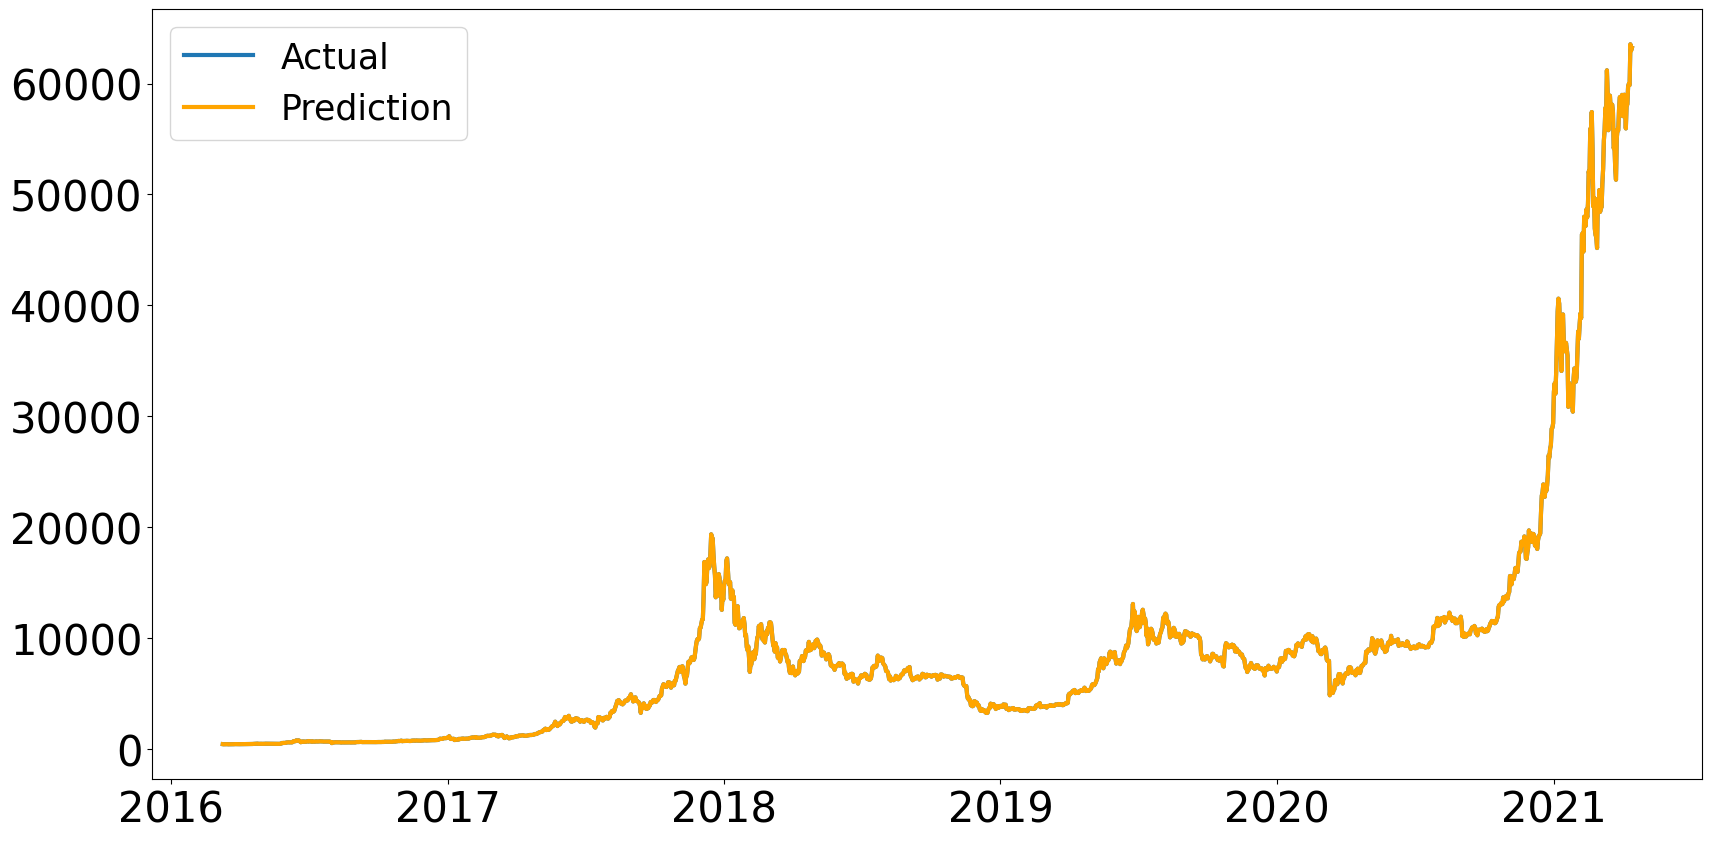

In [24]:
true_train = Y_train.copy()
prediction_train = best_model.predict(X_train)

print('Metric:')
metric(true_train, prediction_train)
print('Visualization:')
plot(true_train, prediction_train, train_date)

#### **3.2.2. Valid set**

Metric:
Root Mean Square Error (RMSE): 4026.7187940544068
Mean Absolute Percentage Error (MAPE): 7.253710140337394
r2 score: 0.7933512329495622

Visualization:


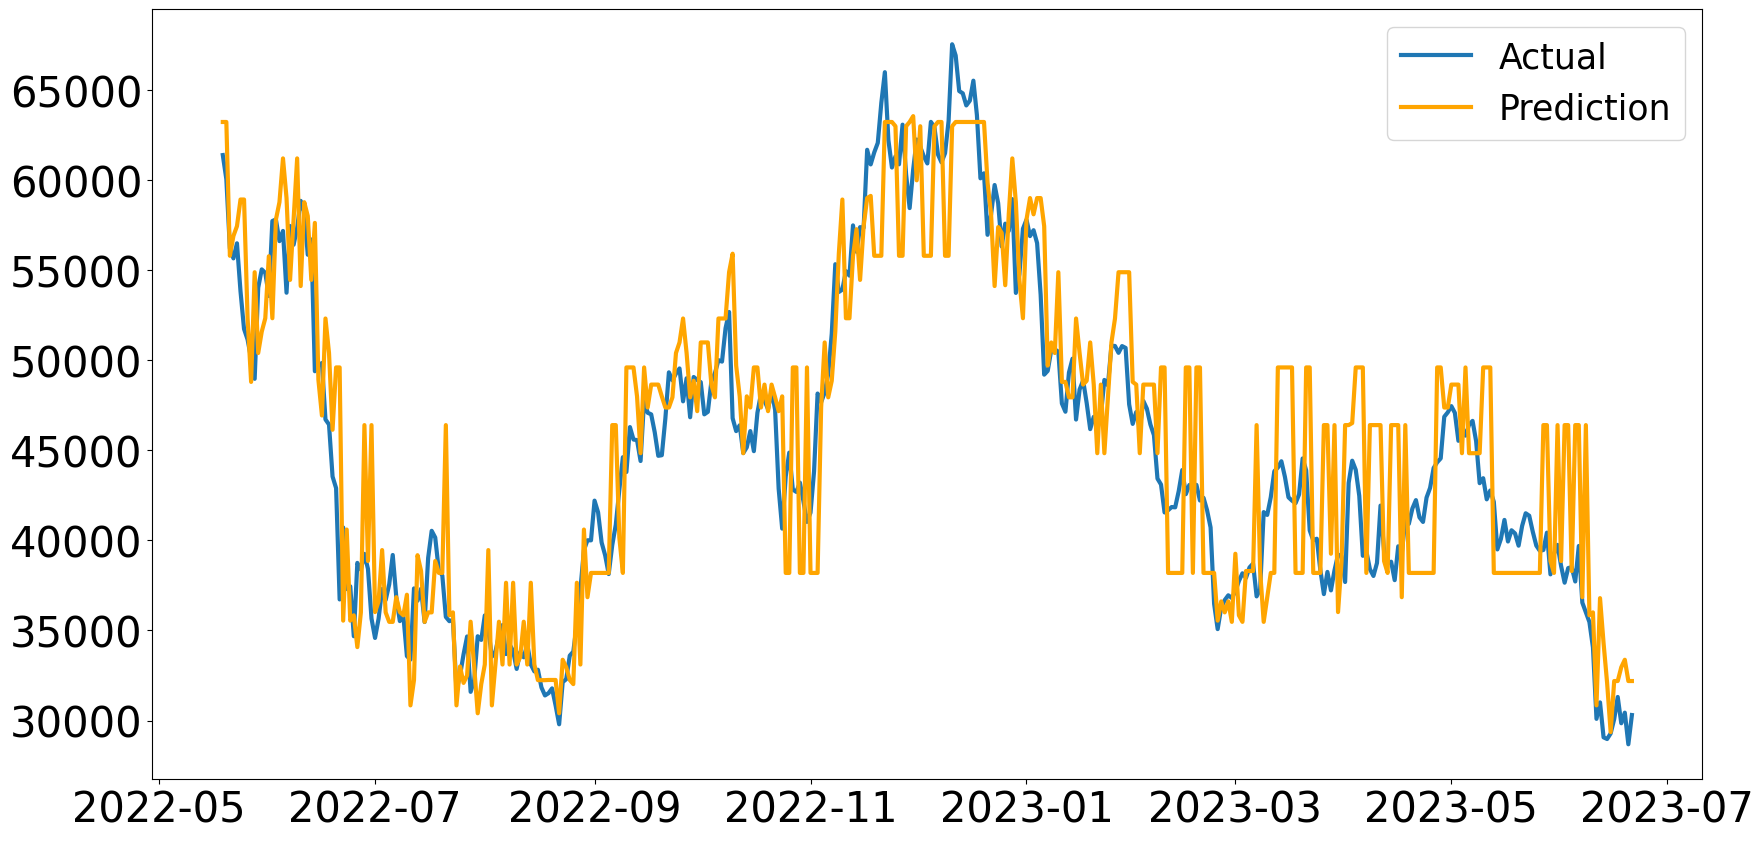

In [25]:
true_test = Y_valid.copy()
prediction_test = best_model.predict(X_valid)
print('Metric:')
metric(true_test, prediction_test)
print('Visualization:')
plot(true_test, prediction_test, test_date)

### **3.3. Evaluate the second model on the train and valid set**


In [26]:
second_model = KNN(
    n_neighbors = second_params['n_neighbors'],
    p = second_params['p']
)
best_model.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=1, p=1)

#### **3.3.1. Train set**

Metric:
Root Mean Square Error (RMSE): 0.0
Mean Absolute Percentage Error (MAPE): 0.0
r2 score: 1.0

Visualization:


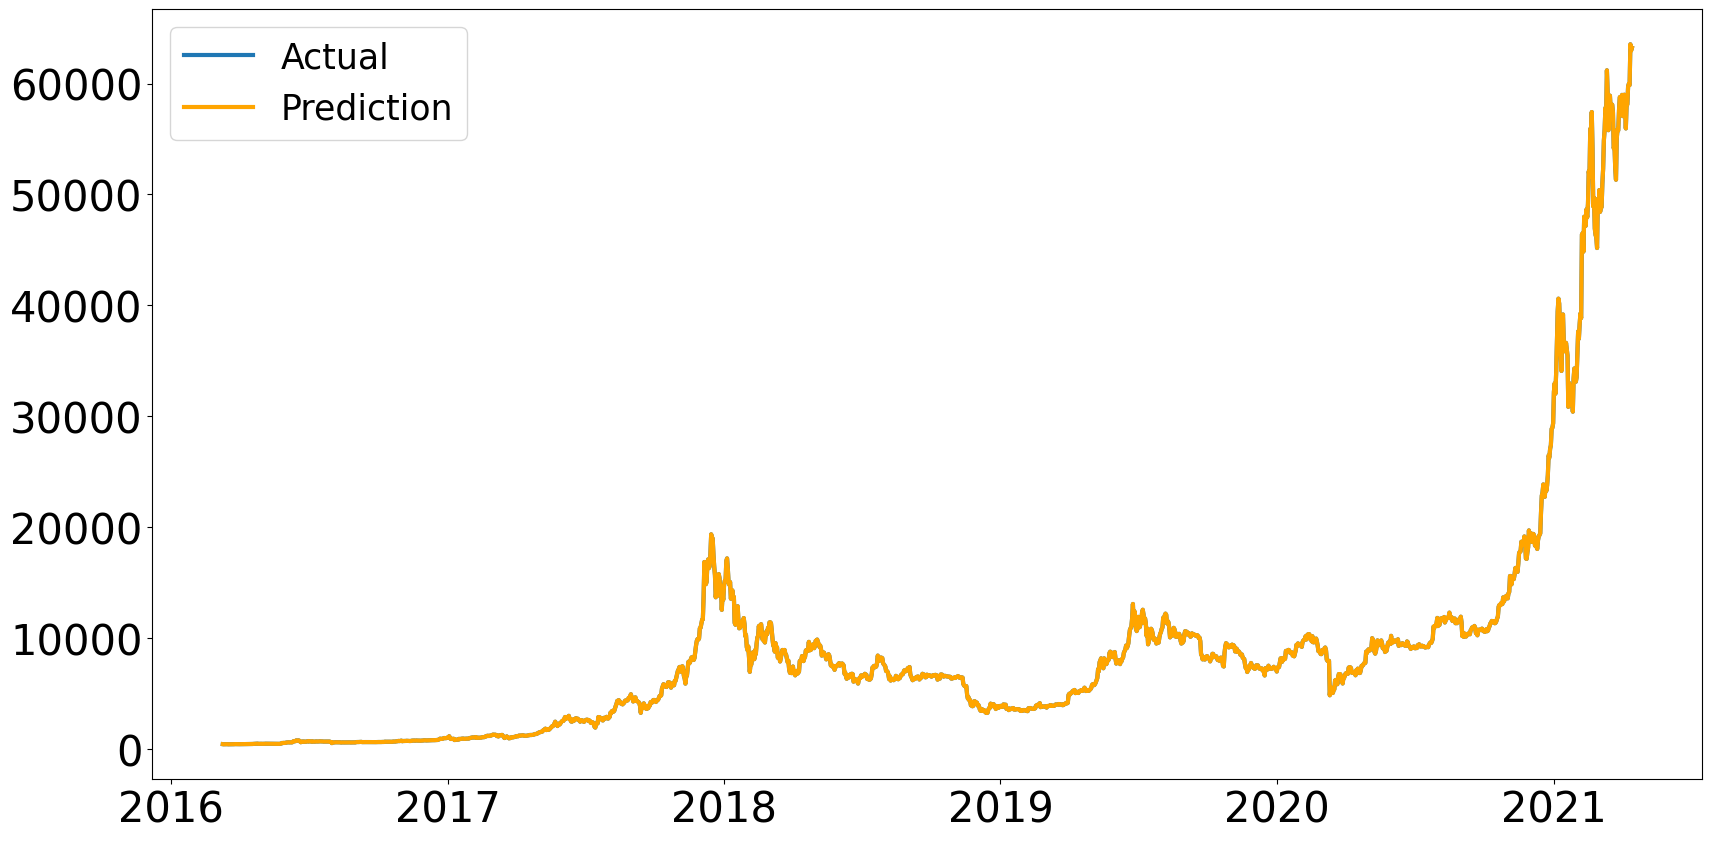

In [27]:
true_train = Y_train.copy()
prediction_train = best_model.predict(X_train)

print('Metric:')
metric(true_train, prediction_train)
print('Visualization:')
plot(true_train, prediction_train, train_date)

#### 3.3.2. **Valid set**

Metric:
Root Mean Square Error (RMSE): 4026.7187940544068
Mean Absolute Percentage Error (MAPE): 7.253710140337394
r2 score: 0.7933512329495622

Visualization:


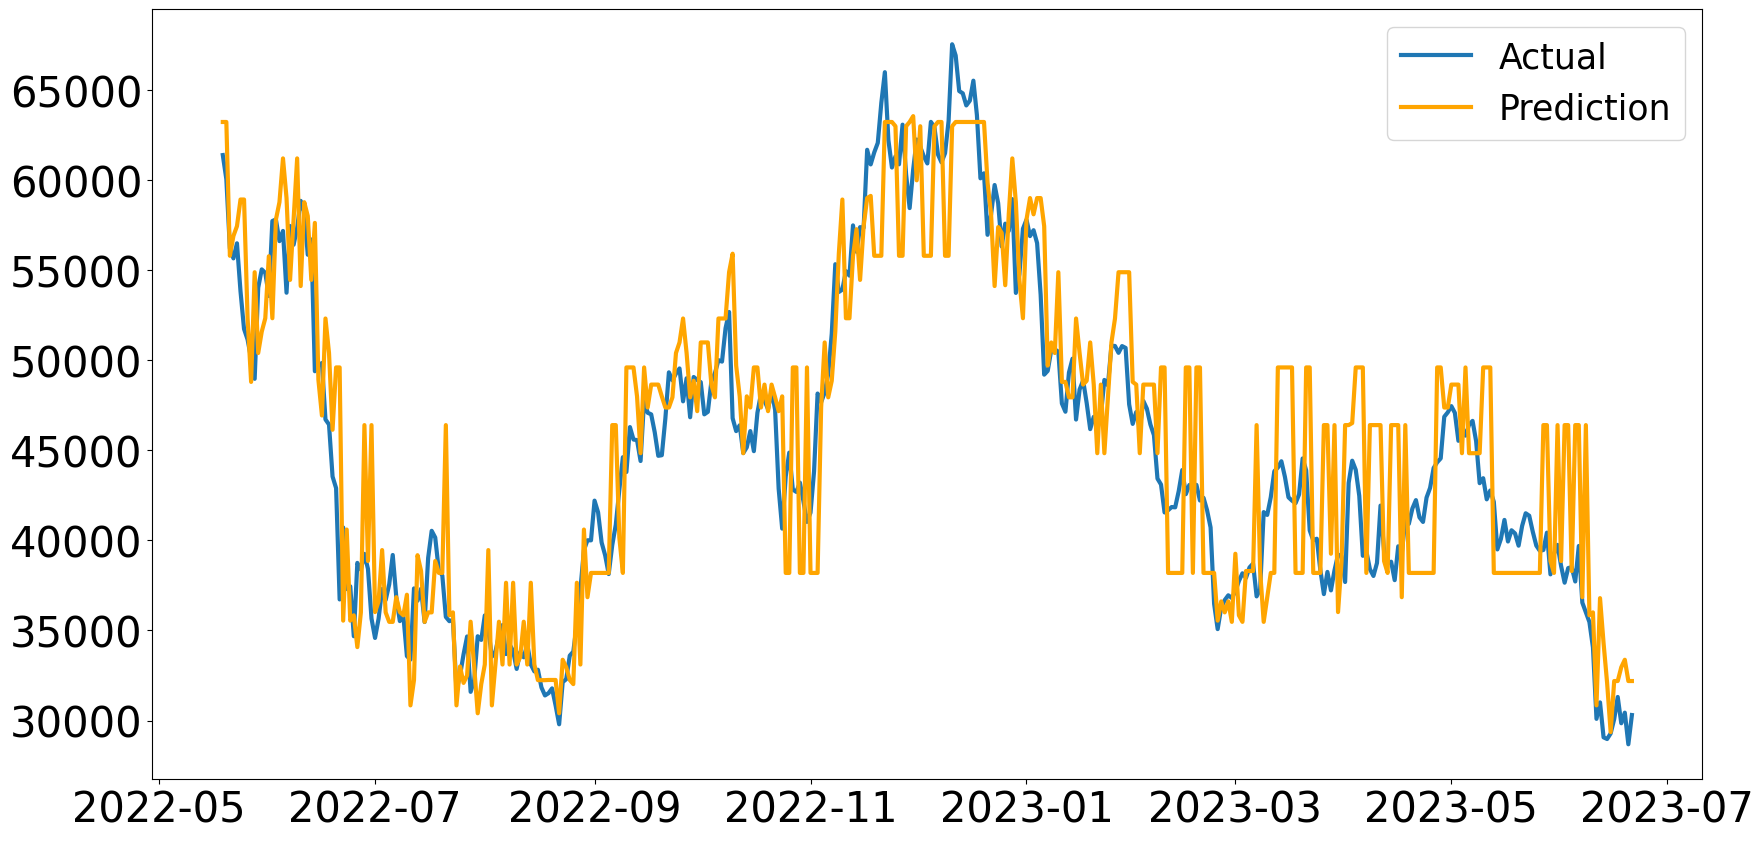

In [28]:
true_test = Y_valid.copy()
prediction_test = best_model.predict(X_valid)
print('Metric:')
metric(true_test, prediction_test)
print('Visualization:')
plot(true_test, prediction_test, test_date)

# **4. Conclusion**

The default model is the best. I will test again on new train & test set.

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled, Y, test_size=0.15, random_state=0,shuffle=False)
train_date, test_date = train_test_split(df['Date'], test_size=0.15, random_state=0,shuffle=False)

In [34]:
knn = KNN()
knn.fit(X_train, Y_train)

KNeighborsRegressor()

#### 4.1. Train

Metric:
Root Mean Square Error (RMSE): 889.2344033752462
Mean Absolute Percentage Error (MAPE): 2.7630727712153194
r2 score: 0.9973653929710667

Visualization:


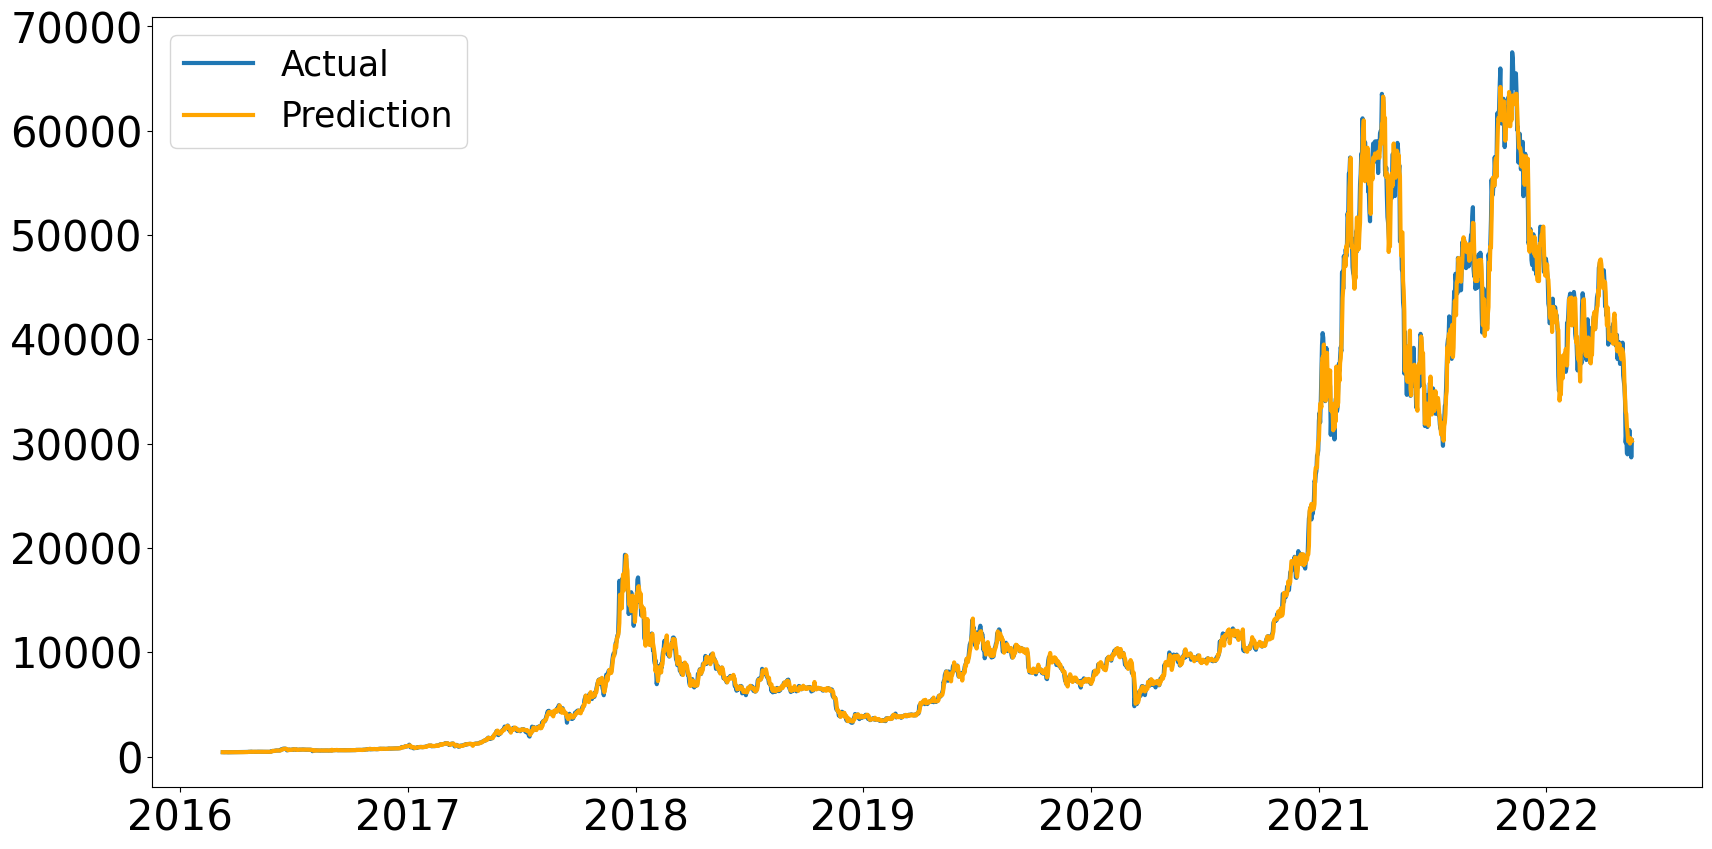

In [35]:
true_test = Y_train.copy()
prediction_test = knn.predict(X_train)
print('Metric:')
metric(true_test, prediction_test)
print('Visualization:')
plot(true_test, prediction_test, train_date)

#### **4.2. Test**

Metric:
Root Mean Square Error (RMSE): 1256.7745193949872
Mean Absolute Percentage Error (MAPE): 4.018071604463512
r2 score: 0.9112754477111241

Visualization:


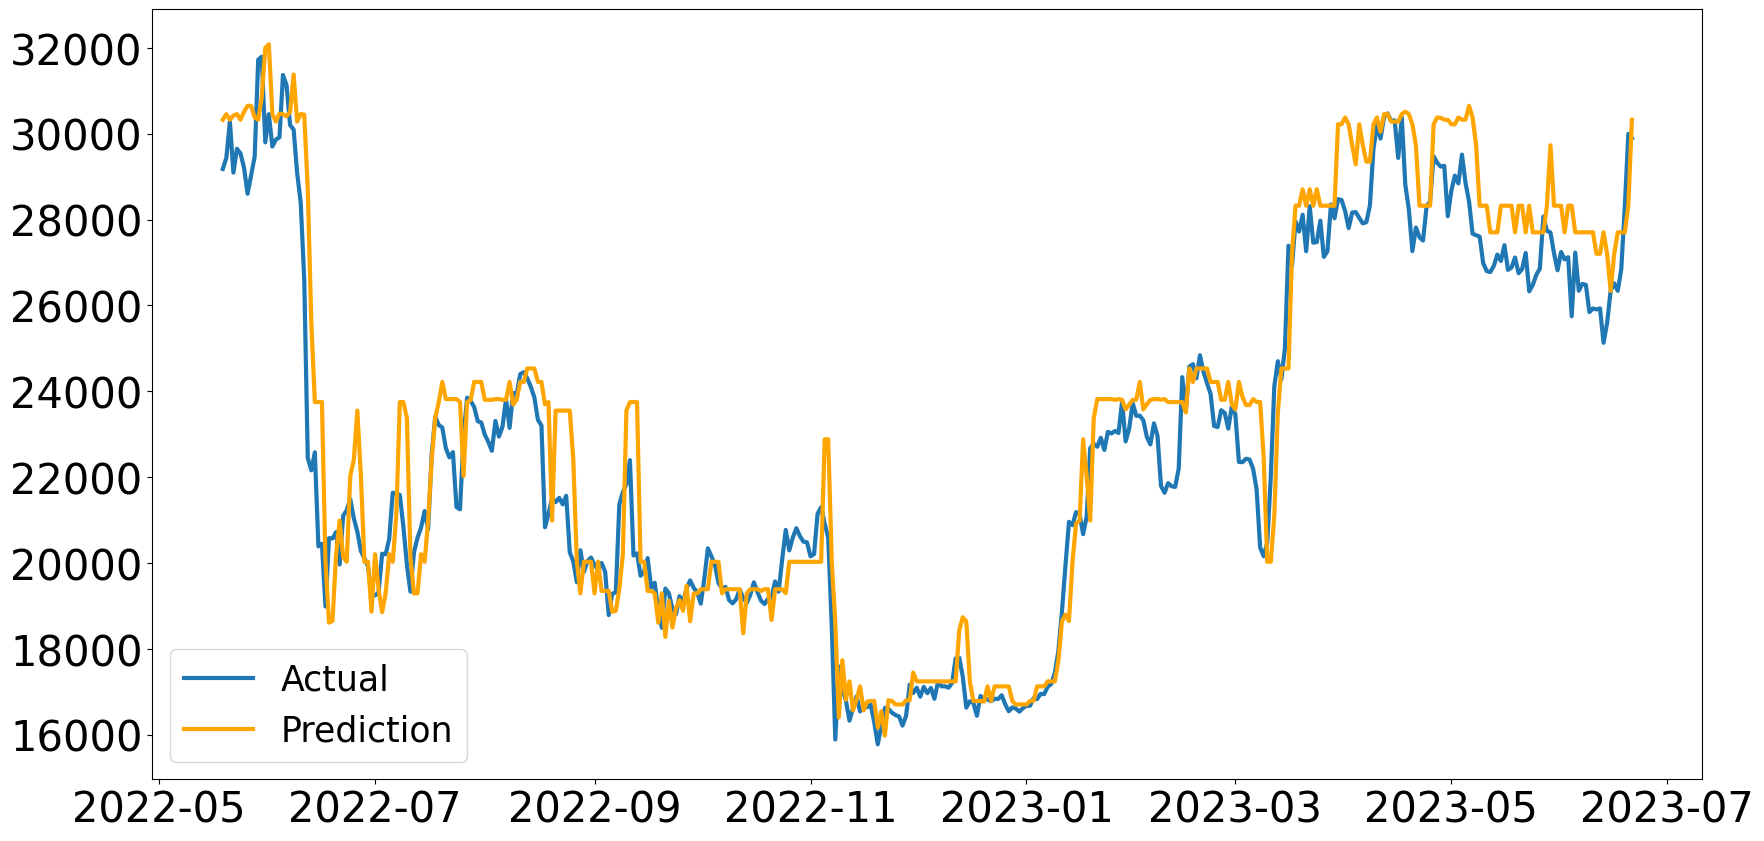

In [36]:
true_test = Y_test.copy()
prediction_test = knn.predict(X_test)
print('Metric:')
metric(true_test, prediction_test)
print('Visualization:')
plot(true_test, prediction_test, test_date)